## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  56.616102  1384.294703  0.474276  10.975171  659.005232
1  87.734582  1313.451826  0.178876   5.229839  250.583851
2   9.785813   641.334491  0.737486   1.966636  473.172289
3  40.795823  1047.842600  0.631932   9.364888  663.339573
4  51.230800   558.816164  0.390684   7.699962  224.319383


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9464870	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9386313	total: 58.8ms	remaining: 29.4s
2:	learn: 0.9276693	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9171721	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9037337	total: 60.2ms	remaining: 12s
5:	learn: 0.8935397	total: 60.7ms	remaining: 10.1s
6:	learn: 0.8832812	total: 61.2ms	remaining: 8.69s
7:	learn: 0.8703138	total: 61.7ms	remaining: 7.65s
8:	learn: 0.8623414	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8513941	total: 62.8ms	remaining: 6.21s
10:	learn: 0.8419304	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8314100	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8192476	total: 64.1ms	remaining: 4.87s
13:	learn: 0.8078189	total: 64.7ms	remaining: 4.55s
14:	learn: 0.7969813	total: 65.2ms	remaining: 4.28s
15:	learn: 0.7866523	total: 65.7ms	remaining: 4.04s
16:	learn: 0.7789726	total: 66.1ms	remaining: 3.82s
17:	learn: 0.7693049	total: 66.5ms	remaining: 3.63s
18:	learn: 0.7627272	total: 66.9ms	remaining: 

111:	learn: 0.2769477	total: 106ms	remaining: 843ms
112:	learn: 0.2742428	total: 107ms	remaining: 840ms
113:	learn: 0.2719594	total: 107ms	remaining: 835ms
114:	learn: 0.2693213	total: 108ms	remaining: 829ms
115:	learn: 0.2668586	total: 108ms	remaining: 824ms
116:	learn: 0.2639232	total: 109ms	remaining: 819ms
117:	learn: 0.2615165	total: 109ms	remaining: 815ms
118:	learn: 0.2590494	total: 109ms	remaining: 810ms
119:	learn: 0.2562750	total: 110ms	remaining: 806ms
120:	learn: 0.2534278	total: 110ms	remaining: 802ms
121:	learn: 0.2502177	total: 111ms	remaining: 797ms
122:	learn: 0.2484138	total: 111ms	remaining: 793ms
123:	learn: 0.2462293	total: 112ms	remaining: 789ms
124:	learn: 0.2444641	total: 112ms	remaining: 785ms
125:	learn: 0.2414565	total: 113ms	remaining: 781ms
126:	learn: 0.2396211	total: 113ms	remaining: 777ms
127:	learn: 0.2376748	total: 114ms	remaining: 773ms
128:	learn: 0.2353524	total: 114ms	remaining: 769ms
129:	learn: 0.2329760	total: 114ms	remaining: 766ms
130:	learn: 

291:	learn: 0.0738058	total: 186ms	remaining: 450ms
292:	learn: 0.0734465	total: 186ms	remaining: 450ms
293:	learn: 0.0729065	total: 187ms	remaining: 449ms
294:	learn: 0.0726560	total: 187ms	remaining: 447ms
295:	learn: 0.0724543	total: 188ms	remaining: 447ms
296:	learn: 0.0718925	total: 188ms	remaining: 446ms
297:	learn: 0.0716628	total: 189ms	remaining: 445ms
298:	learn: 0.0714174	total: 189ms	remaining: 444ms
299:	learn: 0.0711624	total: 190ms	remaining: 443ms
300:	learn: 0.0709806	total: 190ms	remaining: 442ms
301:	learn: 0.0705135	total: 191ms	remaining: 441ms
302:	learn: 0.0702791	total: 191ms	remaining: 440ms
303:	learn: 0.0699845	total: 192ms	remaining: 440ms
304:	learn: 0.0697120	total: 192ms	remaining: 439ms
305:	learn: 0.0695398	total: 193ms	remaining: 438ms
306:	learn: 0.0693031	total: 193ms	remaining: 436ms
307:	learn: 0.0691258	total: 194ms	remaining: 435ms
308:	learn: 0.0688944	total: 194ms	remaining: 434ms
309:	learn: 0.0683488	total: 195ms	remaining: 433ms
310:	learn: 

482:	learn: 0.0342180	total: 272ms	remaining: 291ms
483:	learn: 0.0340837	total: 272ms	remaining: 290ms
484:	learn: 0.0338572	total: 273ms	remaining: 290ms
485:	learn: 0.0336207	total: 273ms	remaining: 289ms
486:	learn: 0.0334081	total: 274ms	remaining: 288ms
487:	learn: 0.0332278	total: 274ms	remaining: 287ms
488:	learn: 0.0330934	total: 274ms	remaining: 287ms
489:	learn: 0.0329646	total: 275ms	remaining: 286ms
490:	learn: 0.0327589	total: 275ms	remaining: 285ms
491:	learn: 0.0325850	total: 275ms	remaining: 284ms
492:	learn: 0.0324596	total: 276ms	remaining: 284ms
493:	learn: 0.0322593	total: 276ms	remaining: 283ms
494:	learn: 0.0320908	total: 277ms	remaining: 282ms
495:	learn: 0.0319316	total: 277ms	remaining: 282ms
496:	learn: 0.0318097	total: 278ms	remaining: 281ms
497:	learn: 0.0316165	total: 278ms	remaining: 280ms
498:	learn: 0.0314269	total: 278ms	remaining: 279ms
499:	learn: 0.0313076	total: 278ms	remaining: 278ms
500:	learn: 0.0311819	total: 279ms	remaining: 278ms
501:	learn: 

662:	learn: 0.0154364	total: 351ms	remaining: 178ms
663:	learn: 0.0153711	total: 352ms	remaining: 178ms
664:	learn: 0.0153067	total: 352ms	remaining: 177ms
665:	learn: 0.0152360	total: 352ms	remaining: 177ms
666:	learn: 0.0151728	total: 353ms	remaining: 176ms
667:	learn: 0.0151106	total: 353ms	remaining: 176ms
668:	learn: 0.0150416	total: 354ms	remaining: 175ms
669:	learn: 0.0149675	total: 354ms	remaining: 174ms
670:	learn: 0.0148994	total: 355ms	remaining: 174ms
671:	learn: 0.0148419	total: 355ms	remaining: 173ms
672:	learn: 0.0147658	total: 355ms	remaining: 173ms
673:	learn: 0.0147017	total: 356ms	remaining: 172ms
674:	learn: 0.0146457	total: 356ms	remaining: 172ms
675:	learn: 0.0145842	total: 357ms	remaining: 171ms
676:	learn: 0.0145275	total: 357ms	remaining: 170ms
677:	learn: 0.0144623	total: 358ms	remaining: 170ms
678:	learn: 0.0144029	total: 358ms	remaining: 169ms
679:	learn: 0.0143489	total: 358ms	remaining: 169ms
680:	learn: 0.0142909	total: 359ms	remaining: 168ms
681:	learn: 

893:	learn: 0.0072494	total: 454ms	remaining: 53.8ms
894:	learn: 0.0072455	total: 454ms	remaining: 53.3ms
895:	learn: 0.0072414	total: 455ms	remaining: 52.8ms
896:	learn: 0.0072376	total: 455ms	remaining: 52.3ms
897:	learn: 0.0072010	total: 456ms	remaining: 51.7ms
898:	learn: 0.0071679	total: 456ms	remaining: 51.2ms
899:	learn: 0.0071639	total: 456ms	remaining: 50.7ms
900:	learn: 0.0071292	total: 457ms	remaining: 50.2ms
901:	learn: 0.0071255	total: 457ms	remaining: 49.7ms
902:	learn: 0.0070863	total: 457ms	remaining: 49.1ms
903:	learn: 0.0070824	total: 458ms	remaining: 48.6ms
904:	learn: 0.0070788	total: 458ms	remaining: 48.1ms
905:	learn: 0.0070750	total: 459ms	remaining: 47.6ms
906:	learn: 0.0070397	total: 459ms	remaining: 47.1ms
907:	learn: 0.0070361	total: 460ms	remaining: 46.6ms
908:	learn: 0.0070326	total: 460ms	remaining: 46.1ms
909:	learn: 0.0069980	total: 460ms	remaining: 45.5ms
910:	learn: 0.0069666	total: 461ms	remaining: 45ms
911:	learn: 0.0069629	total: 461ms	remaining: 44

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

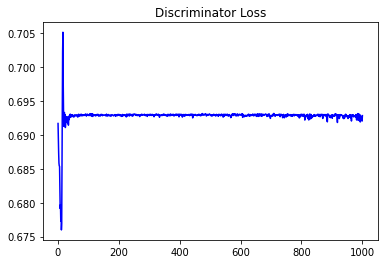

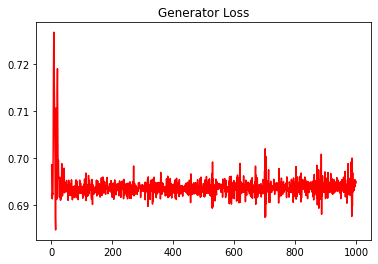

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.008261966416856878


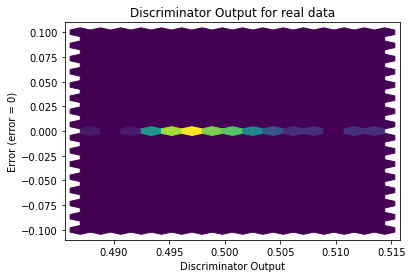

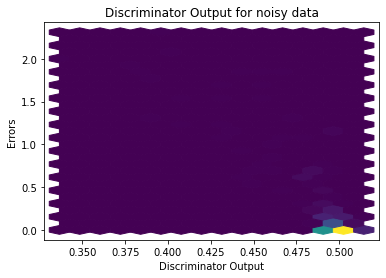

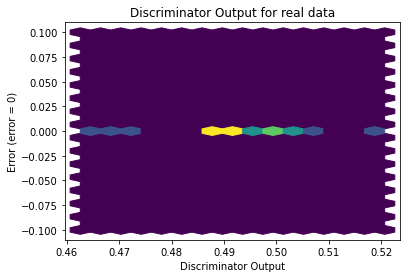

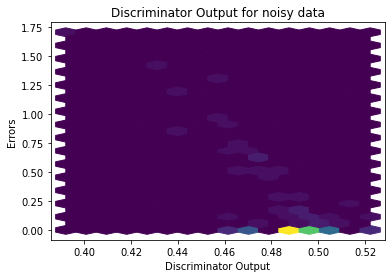

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


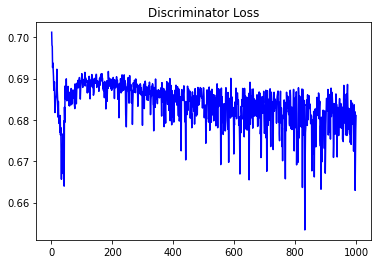

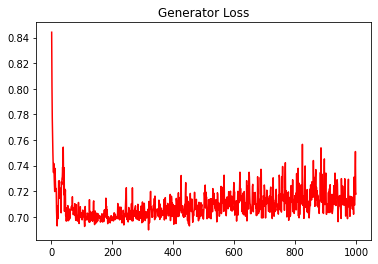

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.003883673483217633


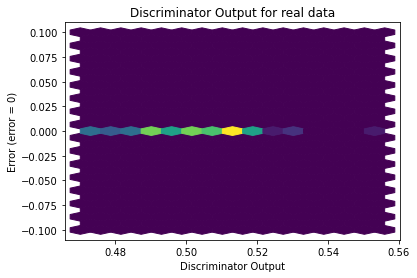

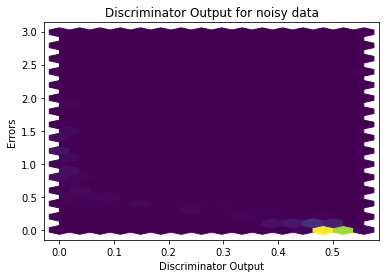

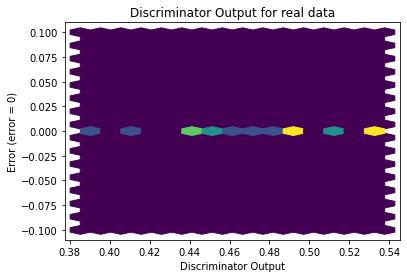

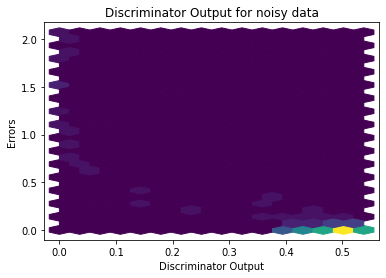

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1879]], requires_grad=True)
